In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [17]:
dataset = pd.read_csv('framingham.csv')
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Looking for duplications

In [18]:
dataset.duplicated().sum()

0

### Handling Outliers 

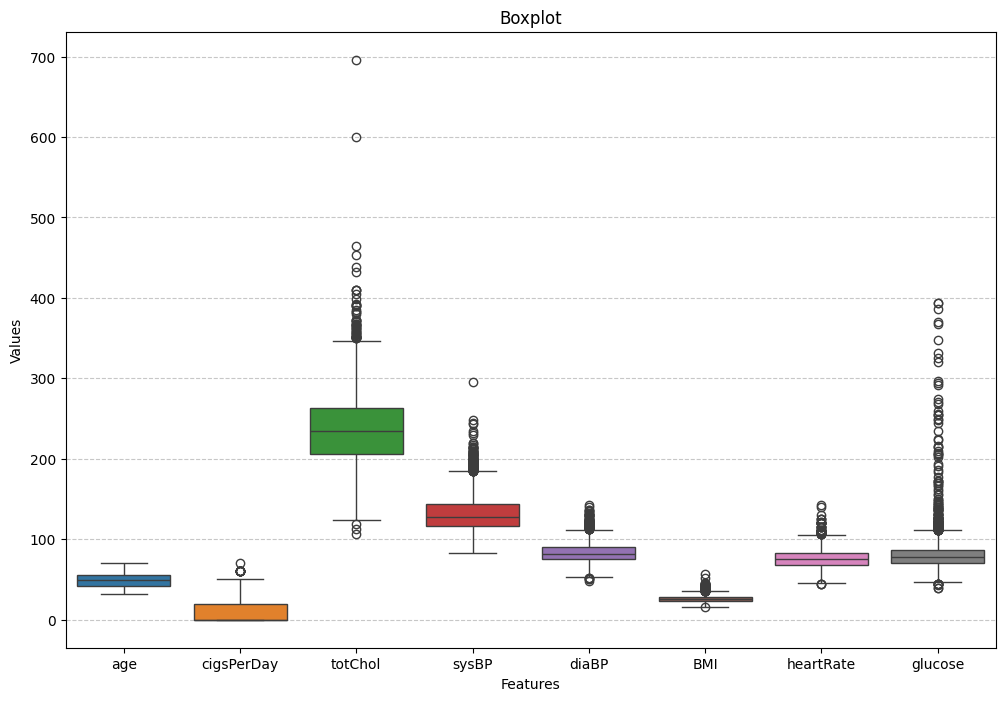

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])
plt.title('Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [20]:
# Using IQR to remove outlier
continuous_columns = [['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

for i in continuous_columns:
    Q1 = dataset[i].quantile(0.25)
    Q3 = dataset[i].quantile(0.75)
    
    IQR= Q3-Q1

    print("Old shape:", dataset.loc[:, i].shape)
    
    # upper bound
    upper = np.where(dataset.loc[:, i] >= (Q3 +2.25*IQR))
    
    # lower bound
    lower = np.where(dataset.loc[:, i] <= (Q1 - 2.25*IQR))
    
    print("{} -- {}".format(upper, lower))

    try:
        dataset.drop(upper[0], inplace = True)
    except:
        print("KeyError: {} not found in axis".format(upper[0]))

    try:
        dataset.drop(lower[0], inplace = True)
    except:
        print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", dataset.shape)
    

Old shape: (4238, 8)
(array([  37,   37,   44,   44,   66,   78,   96,  108,  114,  153,  158,
        165,  194,  212,  249,  249,  339,  358,  369,  390,  409,  421,
        433,  443,  446,  446,  471,  481,  481,  543,  585,  590,  604,
        617,  664,  675,  743,  750,  756,  763,  829,  833,  833,  833,
        864,  864,  894,  903,  924,  952,  965,  969, 1003, 1022, 1030,
       1044, 1068, 1111, 1111, 1131, 1150, 1188, 1189, 1189, 1238, 1268,
       1363, 1456, 1485, 1525, 1544, 1588, 1649, 1674, 1715, 1751, 1760,
       1854, 1931, 1937, 1969, 1981, 1985, 1989, 1989, 1992, 1997, 2000,
       2036, 2041, 2091, 2091, 2093, 2132, 2162, 2162, 2179, 2206, 2217,
       2234, 2237, 2245, 2262, 2271, 2307, 2307, 2378, 2388, 2393, 2406,
       2416, 2416, 2416, 2482, 2492, 2492, 2498, 2503, 2528, 2600, 2608,
       2608, 2625, 2645, 2649, 2657, 2657, 2663, 2683, 2683, 2697, 2801,
       2806, 2824, 2855, 2870, 2883, 2891, 2893, 2907, 2909, 2922, 2926,
       2930, 2961, 2985, 3002

### Handling Null Values

In [21]:
pd.DataFrame({
    'number of null': dataset.isnull().sum(),
    'type': dataset.dtypes
})

,number of null,type
male,0,int64
age,0,int64
education,102,float64
currentSmoker,0,int64
cigsPerDay,27,float64
BPMeds,48,float64
prevalentStroke,0,int64
prevalentHyp,0,int64
diabetes,0,int64
totChol,50,float64


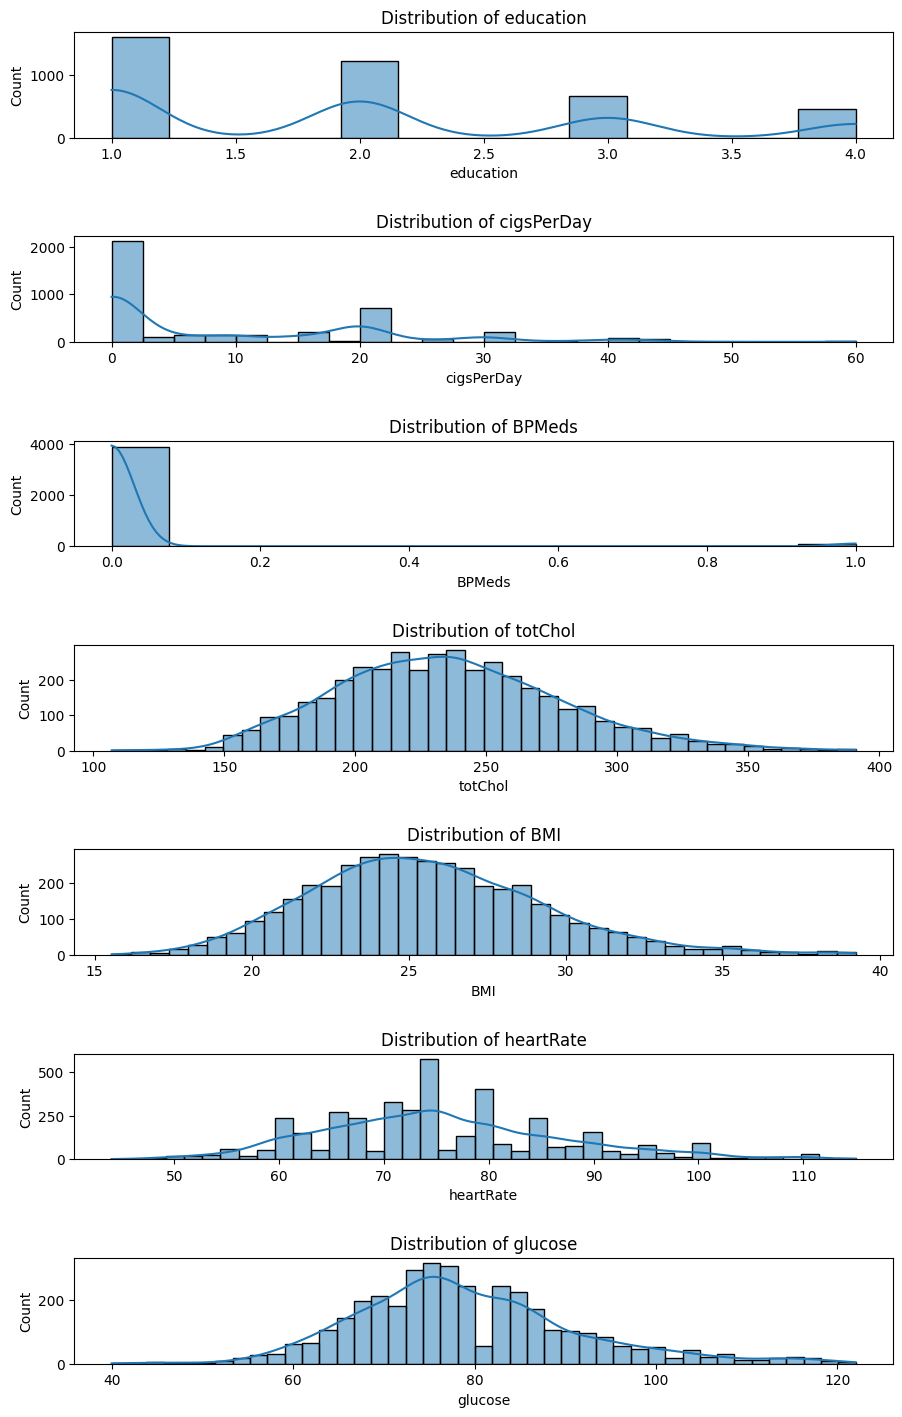

In [22]:
cols_with_missing_values = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plotting the distributions of columns with missing values
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(dataset[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

### Dropping features with high correlation and further no need.

In [23]:
dataset.drop(columns=['education', 'currentSmoker', 'prevalentHyp', 'diaBP'], axis=1, inplace=True)

**Handling null values for  replacing them with the mean and median.** 

In [24]:
# Fill missing values with mode for categorical variables
mean_col = ['heartRate']
for col in mean_col:
    mean_val = dataset[col].mean()  # Mode may return multiple values, so we take the first one
    dataset[col] = dataset[col].fillna(mean_val)

# Fill missing values with mean for numerical variables
median_col = ['cigsPerDay', 'totChol', 'BMI', 'glucose', 'BPMeds']
for col in median_col:
    median_val = dataset[col].median()
    dataset[col] = dataset[col].fillna(median_val)

In [25]:
dataset.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Handling target column

In [26]:
target = dataset['TenYearCHD']
dataset.drop('TenYearCHD', axis=1, inplace=True)

<br>

### Checking if data is imbalanced

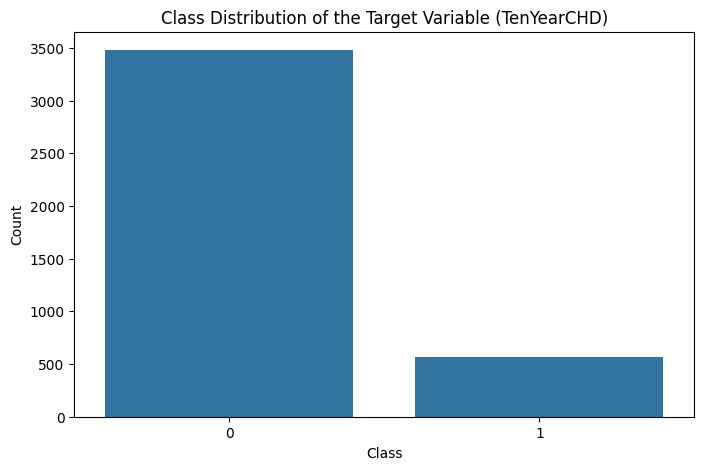

In [35]:
class_counts = target.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y = class_counts.values)
plt.title('Class Distribution of the Target Variable (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Data Encoding

In [36]:
encoded_onehot = pd.get_dummies(dataset['male'], dtype=int)
encoded_onehot.rename(columns={0:'male', 1:'female'}, inplace=True)
dataset.drop(columns='male', axis=1, inplace=True)

In [37]:
dataset = pd.concat([dataset, encoded_onehot], axis=1)

In [38]:
dataset

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female
0,39,0.0,0.0,0,0,195.0,106.0,26.97,80.0,77.0,0,1
1,46,0.0,0.0,0,0,250.0,121.0,28.73,95.0,76.0,1,0
2,48,20.0,0.0,0,0,245.0,127.5,25.34,75.0,70.0,0,1
3,61,30.0,0.0,0,0,225.0,150.0,28.58,65.0,103.0,1,0
4,46,23.0,0.0,0,0,285.0,130.0,23.10,85.0,85.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,0,313.0,179.0,25.97,66.0,86.0,0,1
4234,51,43.0,0.0,0,0,207.0,126.5,19.71,65.0,68.0,0,1
4235,48,20.0,0.0,0,0,248.0,131.0,22.00,84.0,86.0,1,0
4236,44,15.0,0.0,0,0,210.0,126.5,19.16,86.0,78.0,1,0


### Normalization

In [39]:
scaler = StandardScaler()
normalization = scaler.fit_transform(dataset)

target = target.reset_index(drop=True)
final_dataset = pd.DataFrame(normalization, columns=dataset.columns)
final_dataset['target'] = target

In [40]:
final_dataset.head()

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.757524,-0.162324,-0.072187,-0.099863,-0.961110,-1.240737,0.361848,0.391573,-0.177185,-1.145519,1.145519,0
1,-0.397103,-0.757524,-0.162324,-0.072187,-0.099863,0.335695,-0.496956,0.832289,1.685033,-0.262482,0.872966,-0.872966,0
2,-0.162655,0.918782,-0.162324,-0.072187,-0.099863,0.217804,-0.174651,-0.073845,-0.039581,-0.774266,-1.145519,1.145519,0
3,1.361256,1.756935,-0.162324,-0.072187,-0.099863,-0.253762,0.941021,0.792195,-0.901888,2.040544,0.872966,-0.872966,1
4,-0.397103,1.170228,-0.162324,-0.072187,-0.099863,1.160935,-0.050687,-0.672588,0.822726,0.505193,0.872966,-0.872966,0


In [52]:
final_dataset.shape

(4051, 13)

### Unsampling the minority class

In [45]:
data_majority = final_dataset[final_dataset['target']==0]
data_minority = final_dataset[final_dataset['target']==1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=44)
data_unsampled = pd.concat([data_majority, data_minority_upsampled])


In [51]:
data_unsampled.shape

(6962, 13)

In [53]:
data_unsampled.to_csv("cleaned_data.csv", index=False)

In [56]:
import pickle
with open("best_model/encoded_onehot.pkl", "wb") as file:
    pickle.dump(encoded_onehot, file)


with open("best_model/standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

<br>